In [3]:
import pandas as pd 
import seaborn as sb
import seaborn as sns
import datetime as dt 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [5]:
file_1=r'drive/MyDrive/Colab Notebooks/flights.csv'
file_2=r'drive/MyDrive/Colab Notebooks/airports.csv'
file_3=r'drive/MyDrive/Colab Notebooks/airlines.csv'


In [6]:
# reading the flight.csv file
df = pd.read_csv(file_1)
df_airports= pd.read_csv(file_2)
df_airlines = pd.read_csv(file_3)




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# finding total number and names of attributes from the flight.csv  
print(df.head(6))
print('names of the attributes are as following:')
for col in df.columns:
  print(col)

   YEAR  MONTH  DAY  ...  AIRLINE_DELAY LATE_AIRCRAFT_DELAY  WEATHER_DELAY
0  2015      1    1  ...            NaN                 NaN            NaN
1  2015      1    1  ...            NaN                 NaN            NaN
2  2015      1    1  ...            NaN                 NaN            NaN
3  2015      1    1  ...            NaN                 NaN            NaN
4  2015      1    1  ...            NaN                 NaN            NaN
5  2015      1    1  ...            NaN                 NaN            NaN

[6 rows x 31 columns]
names of the attributes are as following:
YEAR
MONTH
DAY
DAY_OF_WEEK
AIRLINE
FLIGHT_NUMBER
TAIL_NUMBER
ORIGIN_AIRPORT
DESTINATION_AIRPORT
SCHEDULED_DEPARTURE
DEPARTURE_TIME
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
SCHEDULED_TIME
ELAPSED_TIME
AIR_TIME
DISTANCE
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
ARRIVAL_TIME
ARRIVAL_DELAY
DIVERTED
CANCELLED
CANCELLATION_REASON
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [8]:
# finding number of samples
total_rows=len(df.axes[0]) #===> Axes of 0 is for a row
total_cols=len(df.axes[1]) #===> Axes of 0 is for a column
print("Number of Samples: "+str(total_rows))
print("Number of Rows: "+str(total_cols))
    

Number of Samples: 5819079
Number of Rows: 31


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
# look for type of attributes
print(df.dtypes)

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object


In [11]:
# check for null values for each attribute and provides filling factor in ascending order
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['variable', 'missing values']
missing_values['filled values (%)']=((df.shape[0]-missing_values['missing values'])/df.shape[0]*100)
missing_values.sort_values('filled values (%)', ascending=True)


,variable,missing values,filled values (%)
25,CANCELLATION_REASON,5729195,1.544643
30,WEATHER_DELAY,4755640,18.275040
28,AIRLINE_DELAY,4755640,18.275040
27,SECURITY_DELAY,4755640,18.275040
26,AIR_SYSTEM_DELAY,4755640,18.275040
29,LATE_AIRCRAFT_DELAY,4755640,18.275040
22,ARRIVAL_DELAY,105071,98.194371
16,AIR_TIME,105071,98.194371
15,ELAPSED_TIME,105071,98.194371
19,TAXI_IN,92513,98.410178


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,0.010784,0.001871,0.003379,0.011437,-0.008917,0.002095,-0.010121,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,0.003403,0.001419,0.001923,0.003529,-0.004294,-0.001656,-0.003688,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,0.014954,0.011510,0.014284,0.016516,0.005642,0.001111,0.007092,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,-0.317394,-0.306611,-0.319681,-0.331280,-0.006134,-0.019740,-0.013947,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,-0.016609,-0.017935,-0.015756,-0.009572,0.656098,-0.044719,0.706237,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,-0.020851,-0.021990,-0.021146,-0.016492,0.675882,-0.040613,0.710223,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,0.027799,0.030805,0.023495,0.024106,0.058674,0.012784,0.097566,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,0.112302,0.205195,0.087608,0.072333,0.032584,0.003221,0.024384,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,-0.028289,-0.027133,-0.029654,-0.027586,0.695734,-0.038814,0.721877,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338


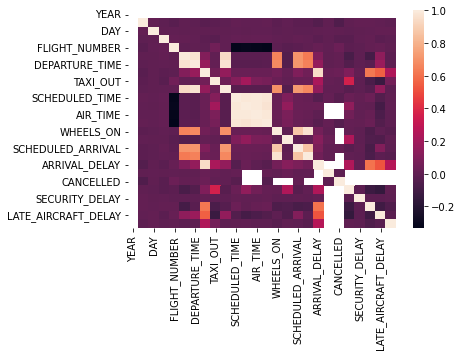

In [12]:
# provides correlation of each attribute. Class label, arrival delay is highly correlated with Departure delay
corr = df.corr(method='pearson')
sb.heatmap(corr)
corr

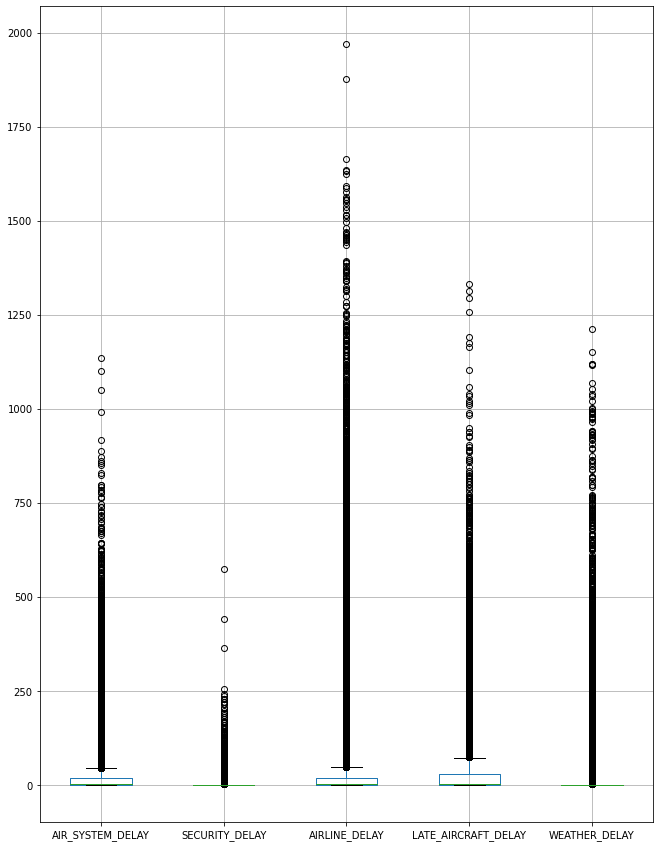

In [13]:
boxplot = df.boxplot(column=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],figsize=(11,15))



In [ ]:
#Checking the distribution of features for delay reasons features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


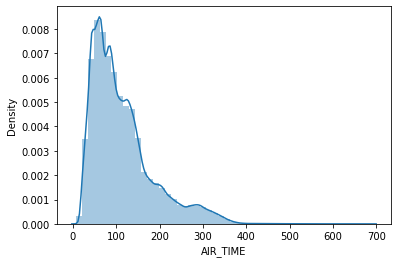

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


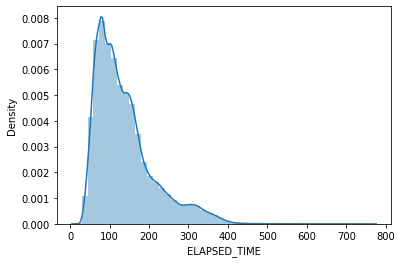

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


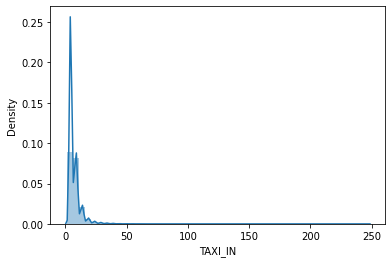

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


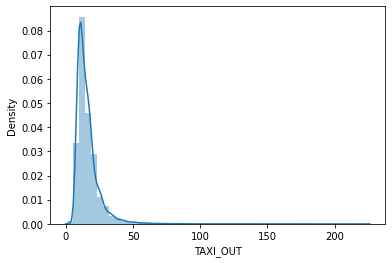

In [14]:
# To check the Distribution of Air Time
sns.distplot(df['AIR_TIME'])
plt.show()

# To check the Distribution of Elapsed Time
sns.distplot(df['ELAPSED_TIME'])
plt.show()


# To check the Distribution of Taxi IN
sns.distplot(df['TAXI_IN'])
plt.show()


# To check the Distribution of Taxi out
sns.distplot(df['TAXI_OUT'])
plt.show()


In [15]:
# number of cancelled flights
print ("number of cancelled flights are:", int(df.shape[0]*df.CANCELLED.mean()))

# Flights with cancellation reasons
print ("number of flights having cancellation reasons are:", df.shape[0] - df.CANCELLATION_REASON.isnull().sum().sum())

number of cancelled flights are: 89884
number of flights having cancellation reasons are: 89884


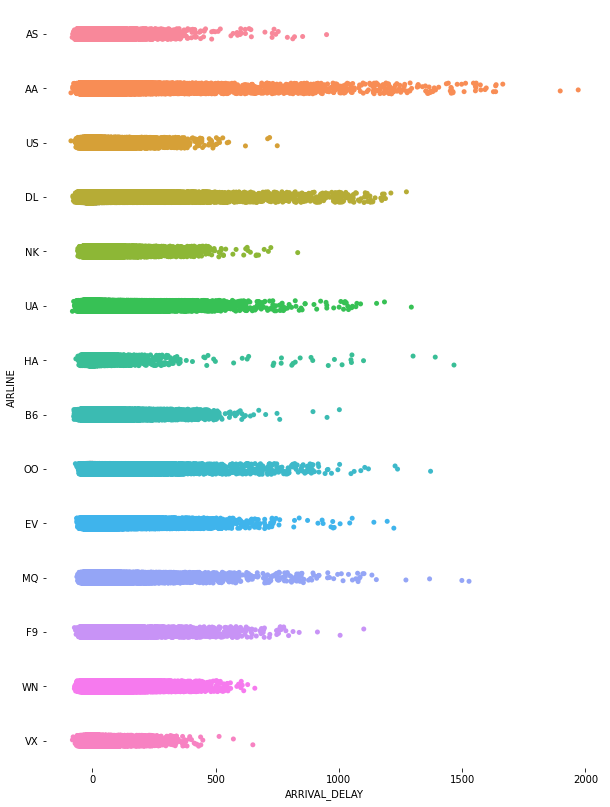

In [16]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",data = df, dodge=True, jitter=True)
plt.show()

AA has the highest arrival delay

In [17]:
# number of flights with arrival dealy >15 mins
Delayed_flights = (df['ARRIVAL_DELAY'][df['ARRIVAL_DELAY'] >= 15].count())
print("No of delayed flights as per IATA definition are", Delayed_flights, "which is", int(Delayed_flights/df.shape[0]*100),"% of the total flights.")

No of delayed flights as per IATA definition are 1063439 which is 18 % of the total flights.


Now, delay analysis with respect to airlines is carried out. Purpose of this analysis is to check delays caused by airlines. These delays can usually be controlled by the operating airline. For this, first we get a count of the flights delayed due to AIRLINE_DELAY

In [18]:
Airline_Delayed=(df['AIRLINE_DELAY'][df['AIRLINE_DELAY'] >= 15].count())
a=(Airline_Delayed/Delayed_flights)*100
print("Number of delayed flights caused by airlines are:", Airline_Delayed, "which is", int(a),"% of the total delayed flights")

Number of delayed flights caused by airlines are: 327257 which is 30 % of the total delayed flights


30% is a significant number. Hence, it is important to get a breakdown of the flights by airlines. Also, important to get an insight into individual airline's operational performance as well.

In [19]:
df['AIRLINE_DELAY']=df['AIRLINE_DELAY'].replace(0,np.nan)



In [20]:
Airline_Delayed=(df['AIRLINE_DELAY'][df['AIRLINE_DELAY'] >= 15].count())
a=(Airline_Delayed/Delayed_flights)*100
print("Number of delayed flights caused by airlines are:", Airline_Delayed, "which is", int(a),"% of the total delayed flights")

Number of delayed flights caused by airlines are: 327257 which is 30 % of the total delayed flights


         AIRLINE_DELAY
AIRLINE               
AA               42039
AS                5593
B6               17846
DL               35964
EV               32615
F9                5274
HA                3706
MQ               16146
NK                7723
OO               27330
UA               38318
US               10740
VX                2202
WN               65179


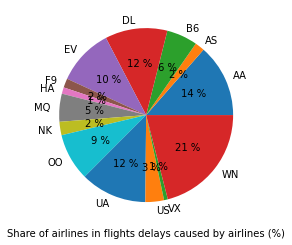

In [21]:
df_filtered = df.query('AIRLINE_DELAY > 15')
delay_by_airline=df_filtered.groupby(by=["AIRLINE"]).aggregate({"AIRLINE_DELAY":"count"})
print(delay_by_airline)
res_2=delay_by_airline.reset_index()
plt.pie(x="AIRLINE_DELAY",labels="AIRLINE", data=res_2, autopct="%.0f %%")
plt.xlabel("Share of airlines in flights delays caused by airlines (%)")
plt.show()




In [22]:
print(df_airlines)

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


It is clear that Southwest Airlines has the highest share of delays caused by the airlines itself, followed by American Airlines and Delta Airlines. However, this is still not an accurate indicator to measure the airline's operational performance, as some of the airlines may have flown much higher flights as compared to others. Therefore, it is important to check the airline delayed flights as a % of the flights operated by that particular airline

In [23]:
df_filtered_1 = df.query('AIRLINE_DELAY > 15')
Total_flights_by_airlines=df.groupby(by=["AIRLINE"]).aggregate({"ARRIVAL_TIME":"count"})
print(Total_flights_by_airlines)


         ARRIVAL_TIME
AIRLINE              
AA             714855
AS             171692
B6             262687
DL             871946
EV             556425
F9              90231
HA              76093
MQ             279431
NK             115343
OO             577943
UA             508916
US             194586
VX              61365
WN            1245053


In [50]:
frames=[delay_by_airline,Total_flights_by_airlines]
concatinate = pd.concat(frames, axis=1, join="inner")
concatinate.columns = ['Airlinewise delayed flights','Airlinewise total flights']
n=concatinate['Airlinewise delayed flights']/concatinate['Airlinewise total flights']*100
n


AIRLINE
AA    5.880773
AS    3.257578
B6    6.793637
DL    4.124567
EV    5.861527
F9    5.844998
HA    4.870356
MQ    5.778171
NK    6.695682
OO    4.728840
UA    7.529337
US    5.519410
VX    3.588365
WN    5.235038
dtype: float64

United Airways has the highest % of delayed flights when compared to other big carreirs, whereas Delta has one of the lowest delayed flight rate.

What difference does Taxi_in and Taxi_out time make to the arrival delay? For that we first need to see which airline have higher proportion of taxi_in and taxi_out time?

In [25]:
airline_taxi_in = pd.DataFrame({'taxi_in_time' : df.groupby(['AIRLINE'])['TAXI_IN'].mean()}).reset_index()
airline_taxi_out = pd.DataFrame({'taxi_out_time' : df.groupby(['AIRLINE'])['TAXI_OUT'].mean()}).reset_index()

Text(0.5, 1.0, 'Airlinewise Taxi Time')

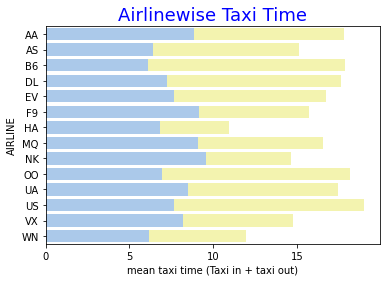

In [26]:
ax = plt.subplots()
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="taxi_out_time", y="AIRLINE", data=airline_taxi_out, color="y")
ax = sns.barplot(x="taxi_in_time", y="AIRLINE", data=airline_taxi_in, color="b")
ax.set(xlabel="mean taxi time (Taxi in + taxi out)")
ax.set_title('Airlinewise Taxi Time', fontsize=18, color="blue")


Taxi In and out time for domestic flights is ussually taken as 15 minutes for domestic flights. But, some of the major airlines such as United Airways, Delta Airlines and American Airlines. Hence, these features would be part of the machine learning models.

Look at various arrival delays (mean) on various days of the week and month. This would provide insights into if there are particular days or months where there ae more delays.

In [27]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    complete_days = days_in_month[:x['MONTH']-1].sum() + x['DAY']
    return complete_days

In [28]:
df['DAY'] = df.apply(day_31_to_365,axis = 1)
df['WEEK'] = df['DAY']//7 #converted days of months into number of weeks


In [29]:
Delay_vs_Day_of_Week = pd.DataFrame({'Arrival delays' : df.groupby(['DAY_OF_WEEK'])['ARRIVAL_DELAY'].mean()}).reset_index()
Delay_vs_WEEK = pd.DataFrame({'Arrival delays' : df.groupby(['WEEK'])['ARRIVAL_DELAY'].mean()}).reset_index()
Delay_vs_SCHEDULED_ARRIVAL = pd.DataFrame({'Arrival delays' : df.groupby(['SCHEDULED_ARRIVAL'])['ARRIVAL_DELAY'].mean()}).reset_index()


[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

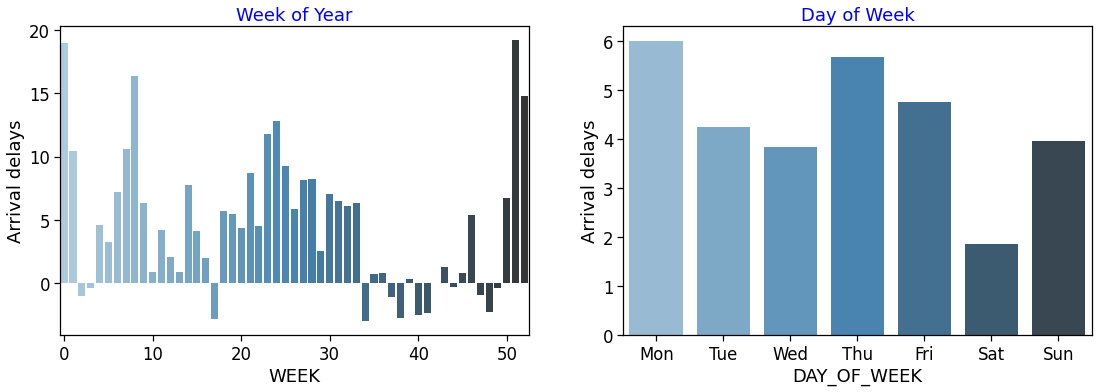

In [30]:
fig = plt.figure(figsize=(18.5, 12.5))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Week of Year', fontsize=18, color="blue")
sns.barplot(x="WEEK", y="Arrival delays", data=Delay_vs_WEEK, palette="Blues_d", ax = sub1)
sub1.set_xticks(list(range(0,52,10)))
sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="blue")
sns.barplot(x="DAY_OF_WEEK", y="Arrival delays", data=Delay_vs_Day_of_Week, palette="Blues_d", ax = sub2)
sub2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])



The above charts indicate that the Arrival delays are pretty heavy during and after the Christmas time. This can be another scope of work to find out why there are delays during this time of the year. Also, Mondays are bad in terms of the delays.

Find out the relationship between Scheduled Arrival Time and Actual arrival time. This would indicate where majority of the flights lie. i.e whether they are on time or not. If not on time how much delayed they are.

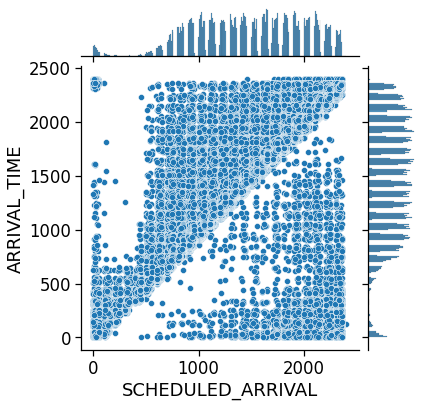

In [31]:
sb.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [32]:
Weather_Delayed=(df['WEATHER_DELAY'][df['WEATHER_DELAY'] >= 15].count())
b=(Weather_Delayed/Delayed_flights)*100
print("Number of delayed flights caused by weather are:", Weather_Delayed, "which is", int(b),"% of the total delayed flights")

Number of delayed flights caused by weather are: 44976 which is 4 % of the total delayed flights


A pattern with respect to weather delay should be looked at. As weather may vary during different part of the year, it is feasible to look at the weather delay with respect to different weeks of the year. 

      WEATHER_DELAY
WEEK               
0              1418
1              1532
2               256
3               551
4              1319
5               633
6              1116
7              1541
8              2087
9               763
10              264
11              642
12              292
13              388
14             1369
15              888
16              719
17              189
18             1290
19              847
20             1199
21             1141
22              921
23             1151
24             1466
25             1627
26              920
27              921
28             1046
29              501
30              970
31              730
32             1274
33             1160
34              507
35              897
36              625
37              545
38              176
39              234
40              268
41              109
42              511
43              616
44              357
45              579
46              896
47              245


Text(0.5, 1.0, 'Flights delayed due to Weather per week')

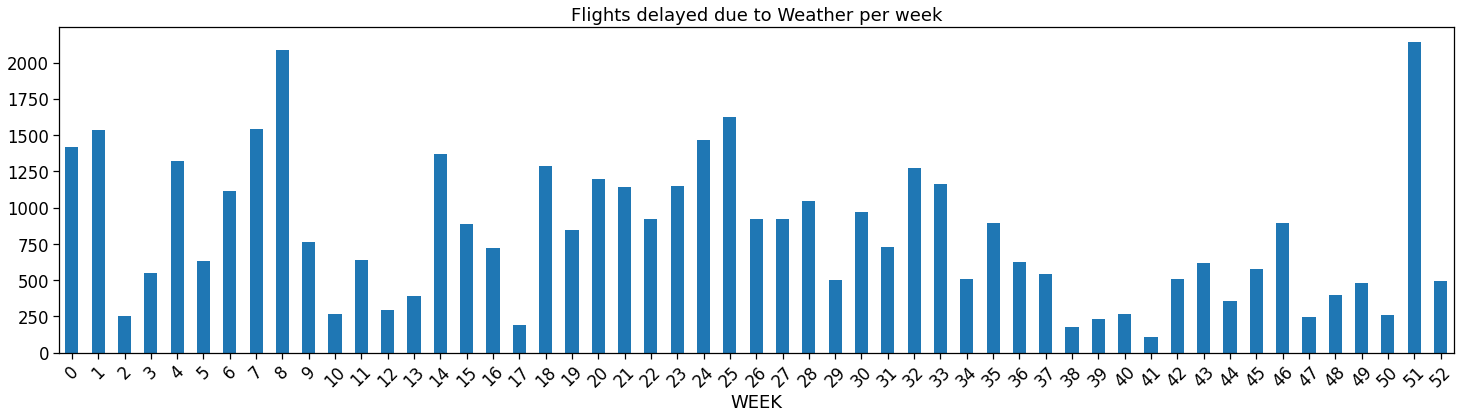

In [33]:
df_weather = df.query('WEATHER_DELAY > 15')
delay_by_weather=df_weather.groupby(by=["WEEK"]).aggregate({"WEATHER_DELAY":"count"})
print(delay_by_weather)
delay_by_weather['WEATHER_DELAY'].plot(kind='bar',figsize=(25,6),rot=45)
plt.title('Flights delayed due to Weather per week')

             WEATHER_DELAY
DAY_OF_WEEK               
1                     7503
2                     6549
3                     5883
4                     6700
5                     6018
6                     5144
7                     5681


Text(0.5, 1.0, 'Flights delayed due to Weather per day of week')

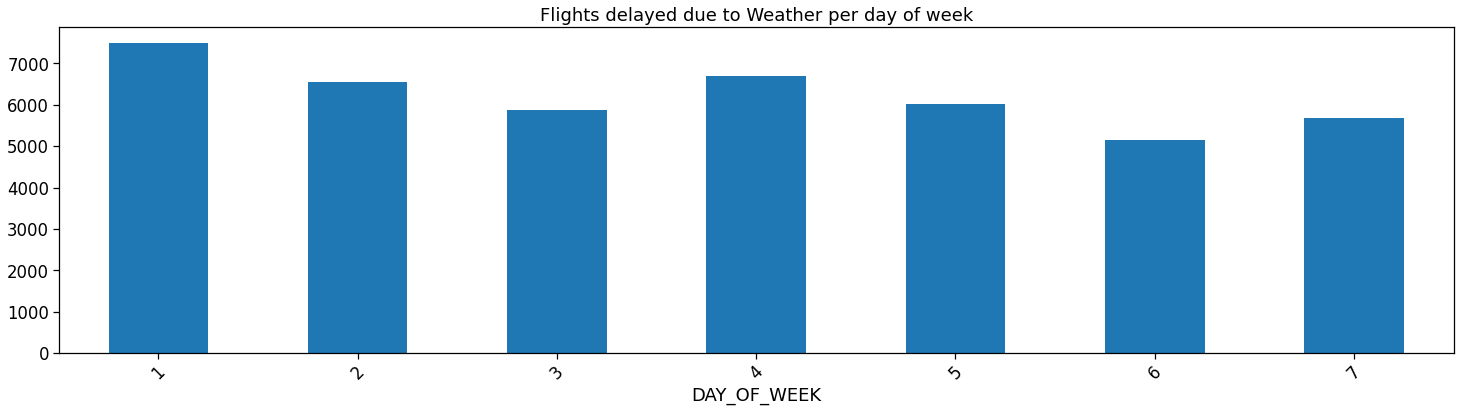

In [34]:
df_weather_day = df.query('WEATHER_DELAY > 15')
delay_by_weather_day=df_weather_day.groupby(by=["DAY_OF_WEEK"]).aggregate({"WEATHER_DELAY":"count"})
print(delay_by_weather_day)
delay_by_weather_day['WEATHER_DELAY'].plot(kind='bar',figsize=(25,6),rot=45)
plt.title('Flights delayed due to Weather per day of week')

Analysis of delay reasons with repsect to airlines and airports is done. Also, airline's operational performance is looked into based on the data available.

Now the process of creating a machine learning model will start. For that first step is to choose the features. As mentioned in the litrature review, class label is the arrival delay. Hence, the feautures will be selected considerning Arrival delay as the class label.

First let's identify correlation of all varibales with class label


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Label encoding features to change categorical variables into numerical one
df['AIRLINE']= le.fit_transform(df['AIRLINE'])
print(df.dtypes)


YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                  int64
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
WEEK                     int64
dtype: o

We would not consider any categorical variable for the purpose of the building model, as we are expecting a numeric output. 

YEAR, DAY and DAY_OF_THE WEEK are ommitted, as these features are mainly for the purpose of the weather related delays. 

Flight Number, Tail number, ORIGIN AIRPORT and DESTINATION AIRPORT are ommitted, as the 

In [36]:
print(corr["ARRIVAL_DELAY"])

YEAR                        NaN
MONTH                 -0.036793
DAY                   -0.003097
DAY_OF_WEEK           -0.017027
FLIGHT_NUMBER          0.018419
SCHEDULED_DEPARTURE    0.100220
DEPARTURE_TIME         0.159787
DEPARTURE_DELAY        0.944672
TAXI_OUT               0.227319
WHEELS_OFF             0.155773
SCHEDULED_TIME        -0.030029
ELAPSED_TIME           0.029120
AIR_TIME              -0.007108
DISTANCE              -0.025444
WHEELS_ON              0.058880
TAXI_IN                0.116628
SCHEDULED_ARRIVAL      0.088824
ARRIVAL_TIME           0.049876
ARRIVAL_DELAY          1.000000
DIVERTED                    NaN
CANCELLED                   NaN
AIR_SYSTEM_DELAY       0.247187
SECURITY_DELAY         0.009655
AIRLINE_DELAY          0.609351
LATE_AIRCRAFT_DELAY    0.522013
WEATHER_DELAY          0.264799
Name: ARRIVAL_DELAY, dtype: float64


We would not consider any categorical variable for the purpose of the building model, as we are expecting a numeric output. 

YEAR, DAY and DAY_OF_THE WEEK are ommitted, as these features are mainly for the purpose of the exploratory analysis. 

Flight Number, Tail number, ORIGIN AIRPORT and DESTINATION AIRPORT are ommitted. Tail number and flight number do not have any significance. While Origin Airport. 

Most significant feature is Departure delay, as can be seen from the correlation data, which is 0.94. Scheduled Departure and Departure time are not signficant,as the departure delay represents both the features. As seen earlier, the taxi in and taxi out contribute to delay of the airline. Hence, we would take them into consideration. Also, we would take Scheduled Arrival into account, as it has high correlation with the class label. All the Delay reasons, apart from Security delay are also highly significant especially the airline delay. Hence, all the delay factors contributing to the Arrival delay would make it to the feature list. 

Following step is to remove the unnecessary features

In [37]:
features1 = df.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE',
                    'DEPARTURE_TIME','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','ARRIVAL_TIME','ARRIVAL_DELAY',
                    'DIVERTED','CANCELLED','CANCELLATION_REASON',"WEEK"], axis=1)
print('names of the features are as following:')
for col in features1.columns:
  print(col)


names of the features are as following:
AIRLINE
DEPARTURE_DELAY
TAXI_OUT
WHEELS_OFF
WHEELS_ON
TAXI_IN
SCHEDULED_ARRIVAL
AIR_SYSTEM_DELAY
SECURITY_DELAY
AIRLINE_DELAY
LATE_AIRCRAFT_DELAY
WEATHER_DELAY


In [38]:
features=features1.fillna(0)
df['ARRIVAL_DELAY_1']=df['ARRIVAL_DELAY'].dropna()

In [39]:
df['ontime'] = [0 if x >= 15 else 1 for x in df['ARRIVAL_DELAY_1']]


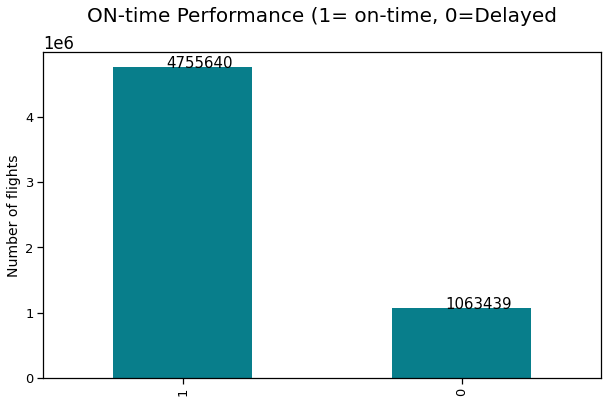

In [40]:
bx = df['ontime'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
bx.set_title('ON-time Performance (1= on-time, 0=Delayed', size=20, pad=30)
bx.set_ylabel('Number of flights', fontsize=14)

for i in bx.patches:
    bx.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


In [41]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(features)
print(scaled)

[[0.07692308 0.03429952 0.09333333 ... 0.         0.         0.        ]
 [0.         0.03574879 0.05333333 ... 0.         0.         0.        ]
 [0.84615385 0.03864734 0.07111111 ... 0.         0.         0.        ]
 ...
 [0.15384615 0.0352657  0.07555556 ... 0.         0.         0.        ]
 [0.15384615 0.03671498 0.04444444 ... 0.         0.         0.        ]
 [0.15384615 0.0468599  0.06222222 ... 0.         0.         0.        ]]


In [42]:
from sklearn.model_selection import train_test_split
X=scaled
y=df['ontime']
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3898782, 12) (1920297, 12) (3898782,) (1920297,)


In [48]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

[1 1 1 ... 1 1 1]
Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
